### Importing required libraries

In [ ]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
from   datetime                        import  datetime,timedelta
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

### Reading time series data 

In [ ]:
df = pd.read_csv('champagne.csv')
df.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [ ]:
df.tail()

,Month,Sales
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [ ]:
date = pd.date_range(start='01/01/1964', end='09/30/1972', freq='M')

In [ ]:
df['Month']=date

In [ ]:
df=df.set_index('Month')

### Plotting time series

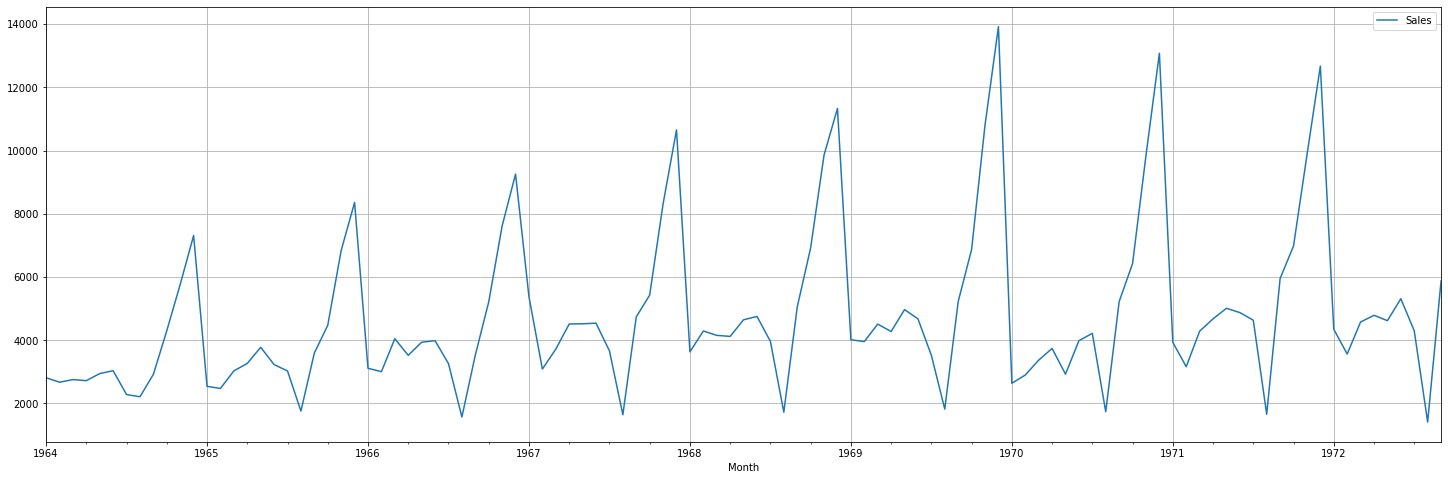

In [ ]:
rcParams['figure.figsize'] = 25,8
df.plot(grid=True);

## Spliting time series data

### Most recent observations will be used to test the model while remaining series will be used to train the model

### if time series has seasonality, then test data must include atleast one seasonal period. 

In [ ]:
train_end=datetime(1971,9,30)
test_end=datetime(1972,9,30)

In [ ]:
train             = df[:train_end] 
test              = df[train_end + timedelta(days=1):test_end]

In [ ]:
print('Train')
display(train)
print('Test')
display(test)

Train


,Sales
Month,
1964-01-31,2815
1964-02-29,2672
1964-03-31,2755
1964-04-30,2721
1964-05-31,2946
...,...
1971-05-31,5010
1971-06-30,4874
1971-07-31,4633


Test


,Sales
Month,
1971-10-31,6981
1971-11-30,9851
1971-12-31,12670
1972-01-31,4348
1972-02-29,3564
1972-03-31,4577
1972-04-30,4788
1972-05-31,4618
1972-06-30,5312


# Double Exponential Smoothing / Holt's linear Method

In [ ]:
model_DES = Holt(train,exponential=True, initialization_method='estimated')

#### training the double exponential model

In [ ]:
model_DES_fit1 = model_DES.fit(optimized=True)

In [ ]:
model_DES_fit1.summary()

Dep. Variable:,Sales,No. Observations:,93
Model:,Holt,SSE,579232186.198
Optimized:,True,AIC,1462.949
Trend:,Multiplicative,BIC,1473.080
Seasonal:,None,AICC,1463.926
Seasonal Periods:,None,Date:,"Fri, 05 Mar 2021"
Box-Cox:,False,Time:,18:44:08
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0757143,alpha,True
smoothing_trend,0.0757143,beta,True


#### Predicting forecast

In [ ]:
DES_predict1 = model_DES_fit1.forecast(steps=len(test))

#### Lets plot the forecast

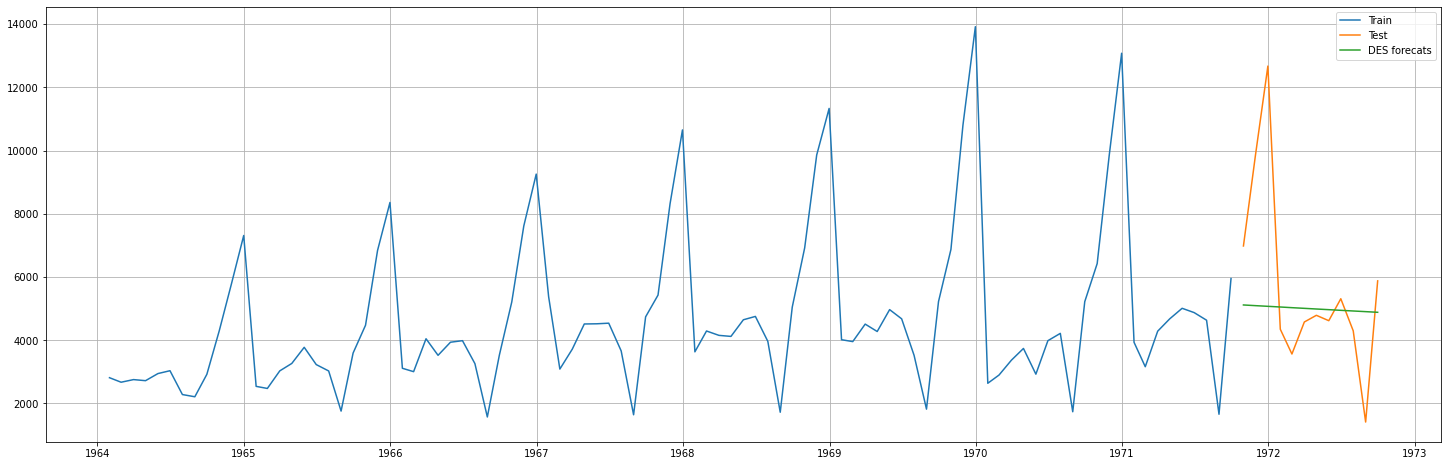

In [ ]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(DES_predict1, label='DES forecats')
plt.legend(loc='best')
plt.grid()

# Triple Exponential Smoothing / Holt-Winters Method

#### lets build model using 'additive' seasonality

In [ ]:
model_TES_add = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')

#### training the model

In [ ]:
model_TES_add = model_TES_add.fit(optimized=True)

In [ ]:
model_TES_add.summary()

Dep. Variable:,Sales,No. Observations:,93
Model:,ExponentialSmoothing,SSE,47037732.592
Optimized:,True,AIC,1253.449
Trend:,Additive,BIC,1293.971
Seasonal:,Additive,AICC,1262.692
Seasonal Periods:,12,Date:,"Fri, 05 Mar 2021"
Box-Cox:,False,Time:,18:44:11
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0686164,alpha,True
smoothing_trend,0.0001169,beta,True


#### predicting forecast

In [ ]:
TES_add_predict =  model_TES_add.forecast(len(test))

#### lets plot foecast results

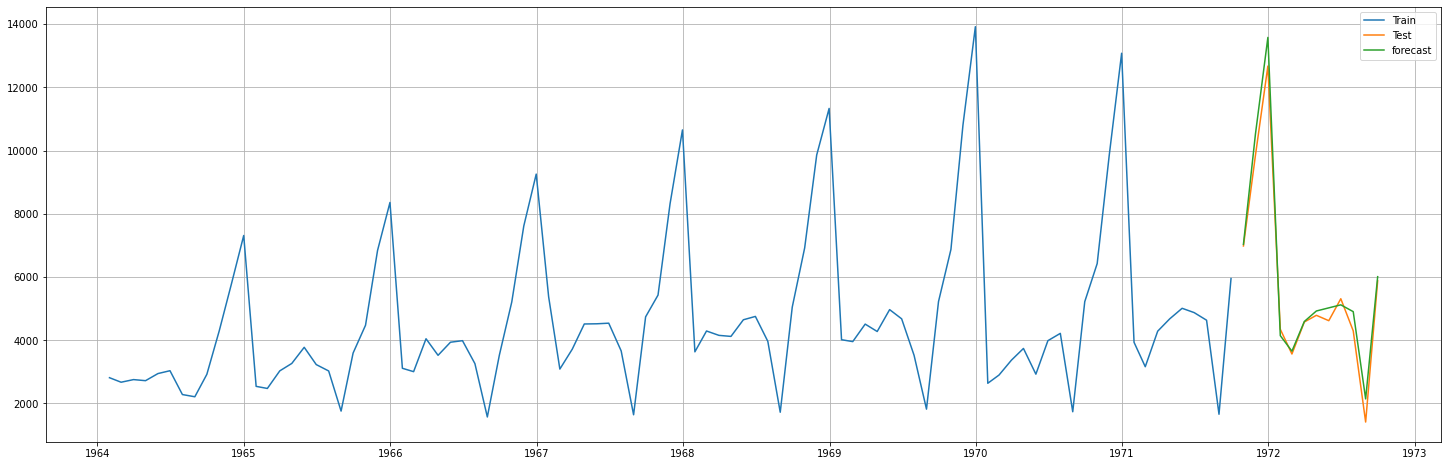

In [ ]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(TES_add_predict, label='forecast')
plt.legend(loc='best')
plt.grid()

#### Root Mean Square Error for simple forecasting model

In [ ]:
mean_squared_error(test.values,TES_add_predict.values,squared=False)

453.3390474295378

#### Defining Mean Absolute Percentage error

In [ ]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

#### Mean Absolute Percentage Error for simple forecasting model

In [ ]:
MAPE(test['Sales'],TES_add_predict)

8.805516048002955

# END